# <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 1: Programming Assignments</p>
## <p style="text-align: center;">Total points: 65  </p>
## <p style="text-align: center;">Due: Feb 16 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

As a general practice, in case of theretical questions (e.g., computation of gradients), the most convenient way of providing an answer is to type it in the provided spaces (markdown cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

# <font color='blue'> Problem 3: Perceptron (20 pts) </font>

## Download data
In this problem, we will use the Iris flower dataset https://www.kaggle.com/arshid/iris-flower-dataset. This dataset contains 4 features (Petal Length, Petal Width, Sepal Length, Sepal Width) that characterize flowers and classify them as belonging to one of 3 classes. For the sake of simplicity of this exercise, we strip the last 100 rows of the dataset so as to exclude the class ‘Iris-virginica’, and proceed by using only 2 classes: ‘Iris-setosa’ and ‘Iris-versicolor’.

In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [593]:
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # filter out one class of the dataset and take the last 100 rows
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asarray(data, dtype = 'float64')
    return data

def step_func(z):
        return 1.0 if (z > 0) else 0.0

data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


## (a) Visualize data (5 pts)
Plot the data with 2-D scatter (see an example below), using different colors to represent points in different classes.

1. Y: petal length, X: sepal length; 

2. Y: petal width, X: sepal width; 

3. Y: petal length, X: petal width; 

4. Y: sepal length, X: sepal width.

## Example:

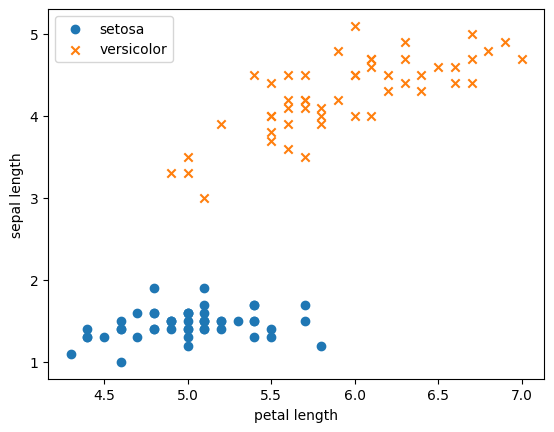

In [594]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

## Your turn: Please show other scatter plots:

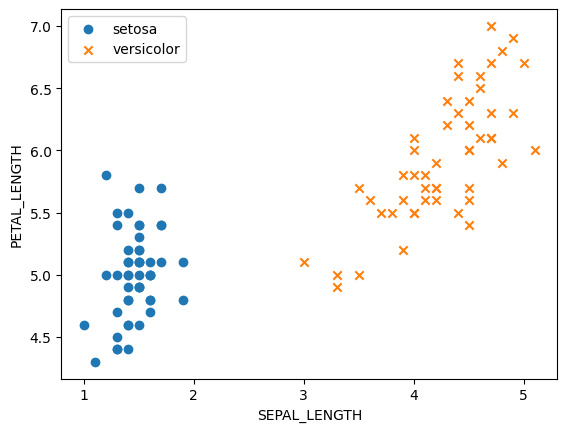

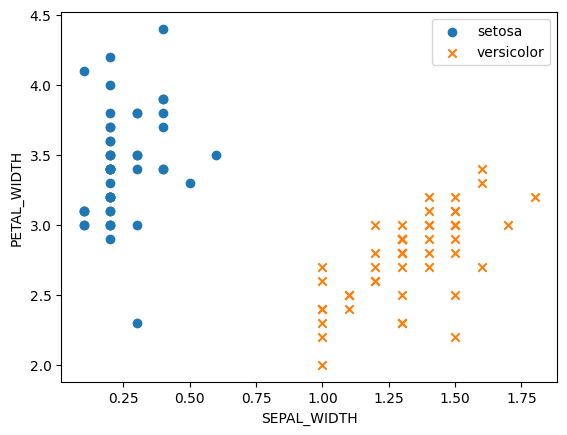

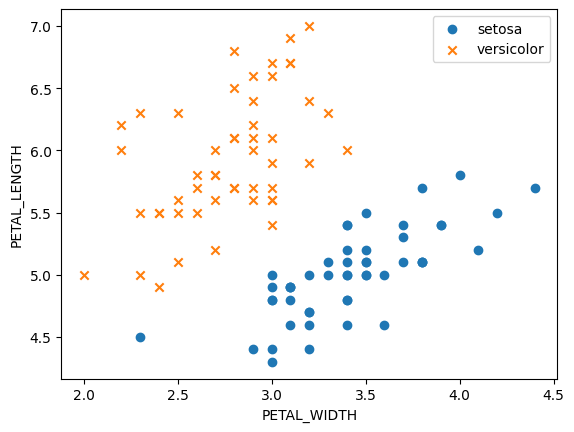

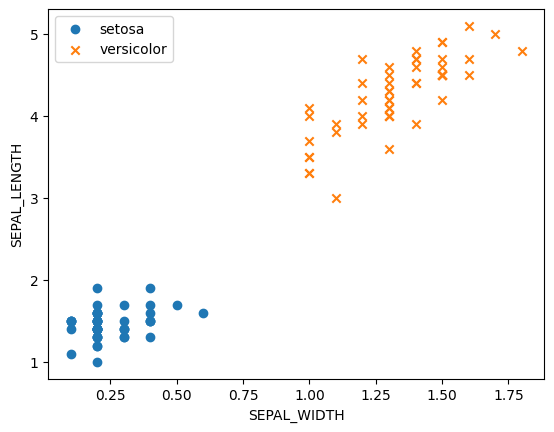

In [595]:
# 4 features (0:Petal Length, 1:Petal Width, 2:Sepal Length, 3:Sepal Width)
from enum import Enum

class Feature(Enum):
    PETAL_LENGTH = 0
    PETAL_WIDTH = 1
    SEPAL_LENGTH = 2
    SEPAL_WIDTH =3

def make_scatter(data, y_plot, x_plot):
    plt.scatter(np.array(data[:50,x_plot.value]), np.array(data[:50,y_plot.value]), marker='o', label='setosa')
    plt.scatter(np.array(data[50:,x_plot.value]), np.array(data[50:,y_plot.value]), marker='x', label='versicolor')
    plt.xlabel(x_plot.name)
    plt.ylabel(y_plot.name)
    plt.legend()
    plt.show()

# 1. Y: petal length, X: sepal length; 
make_scatter(data, Feature.PETAL_LENGTH, Feature.SEPAL_LENGTH)

# 2. Y: petal width, X: sepal width; 
make_scatter(data, Feature.PETAL_WIDTH, Feature.SEPAL_WIDTH)

# 3. Y: petal length, X: petal width; 
make_scatter(data, Feature.PETAL_LENGTH, Feature.PETAL_WIDTH)

# 4. Y: sepal length, X: sepal width.
make_scatter(data, Feature.SEPAL_LENGTH, Feature.SEPAL_WIDTH)

## (b) Program the Perceptron algorithm (8 pts)

In [596]:
def perceptron(data, num_iter):
    features = data[:, :-1]     # features of xn are all rows and all columns up to the last column of the data array
    labels = data[:, -1]        # labels of xn are all rows and the last column of the data array
    
    bias = np.ones((features.shape[0], 1))  # Create array filled with ones.  The size of the array equals the number of rows in data.
    features = np.hstack((bias, features))  # Add bias values to D as x0
    
    w = np.zeros(features.shape[1])         # Initialize w to all zeros
    misclassified_ = []
    
    for _ in range(num_iter):
        n_miss = 0
        for i, xi in enumerate(features):
            wTx = np.dot(xi, w)
            # print("w: ", w, " xi: ", xi, " wTx: ", wTx)
            prediction = step_func(wTx)
            prediction_difference = labels[i] - prediction
            if (prediction_difference) != 0:
                xiyi = prediction_difference*xi
                w += xiyi
                n_miss += 1
        misclassified_.append(n_miss/len(labels))
        if n_miss == 0:
            break
    
    return w, misclassified_

In [597]:
num_iter = 100

w, misclassified_ = perceptron(data, num_iter)
print(w)

[-1.  -1.1 -3.6  5.2  2.2]


## (c) Plot the fraction of misclassified points  vs. iterations (4 pts)

[0.01, 0.03, 0.01, 0.0]
[-1.  -1.1 -3.6  5.2  2.2]


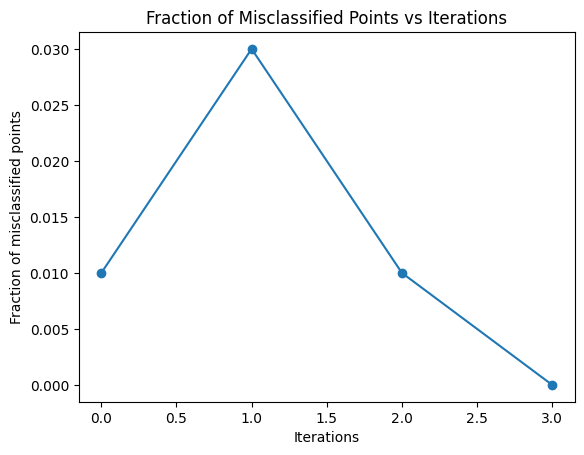

In [598]:
print(misclassified_)
print(w)
plt.plot(misclassified_, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Fraction of misclassified points")
plt.title('Fraction of Misclassified Points vs Iterations')
plt.show()

## (EXTRA) Trying out Perceptron Function with Class Example Set 

w:  [74.          7.93592698 16.70393719]
w0:  74.0  w1:  7.93592697603763  w2:  16.70393718931104
m:  -0.47509320024957236  b:  -4.430093286470994
domain:  [-7.928725598118645, 11.264981117087185]


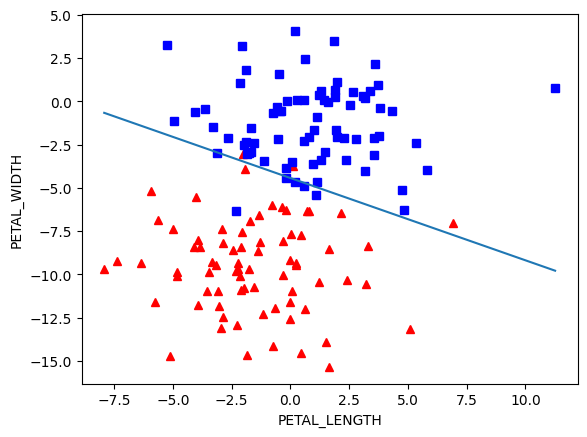

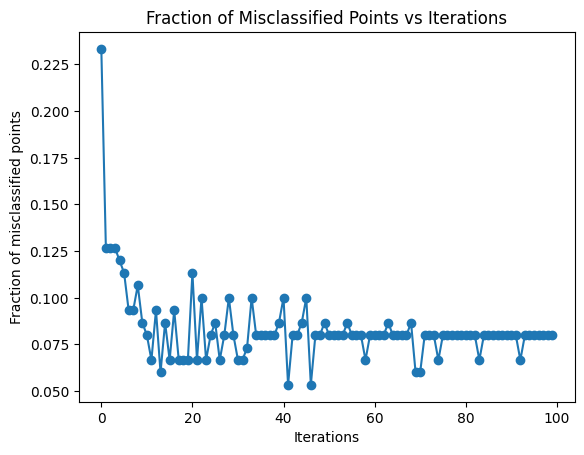

In [599]:
# 4 features (0:Petal Length, 1:Petal Width, 2:Sepal Length, 3:Sepal Width)

from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=2.5,
                           random_state=2)
y = y[:, np.newaxis]
X = np.hstack((X,y))

def make_scatter_with_h(data, y_plot, x_plot, w):
    print("w: ", w)
    w0 = w[0]
    w1 = w[x_plot.value+1]
    w2 = w[y_plot.value+1]
    print("w0: ", w0, " w1: ", w1, " w2: ", w2)
    m = -float(w1/w2)
    b = -float(w0/w2)
    print("m: ", m, " b: ", b)

    y = data[:,-1]
    plt.plot(data[:, 0][y==0], data[:, 1][y==0], "r^")
    plt.plot(data[:, 0][y==1], data[:, 1][y==1], "bs")
    
    plt.xlabel(x_plot.name)
    plt.ylabel(y_plot.name)

    domain_h = [min(data[:,x_plot.value]), max(data[:,x_plot.value])]
    print("domain: ", domain_h)
    h_plot = [m*x + b for x in domain_h]
    plt.plot(domain_h, h_plot)
    plt.show()
    
#  Graph Blobs and weights from Percepton Implementation
num_iter = 100
w, misclassified_ = perceptron(X, num_iter)
make_scatter_with_h(X, Feature.PETAL_WIDTH, Feature.PETAL_LENGTH, w)

plt.plot(misclassified_portion, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Fraction of misclassified points")
plt.title('Fraction of Misclassified Points vs Iterations')
plt.show()     # Looks good!

## (d) Limitation (3 pts)
Write down what you think are the limitation of the Perceptron Learning Algorithm.

In [ ]:
There are several limitations I can forsee to the PLA algorithm:
- The PLA algorithm works best if the data is linearly separable.  If the data isn't linearly separable then the algorithm may not converge.
- I noticed that if I changed the initial weights, it would have a pretty big impact on the final result.
- I also noticed that if the iteration rule picked an extreme outlier, it could have a big impact on the boundry condition

# <font color='blue'> Problem 4: Linear Regression (20 pts) </font>

In this problem, we will use linear regression to predict house prices. The data (which we will load as a pandas dataframe) is in Housing.csv file that you can download from Canvas.

## Import standard libraries and load data

In [600]:
# from google.colab import files
# uploaded = files.upload()

# supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# data visualization:
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

ModuleNotFoundError: No module named 'seaborn'

## (a) Data exploration (4 pts)

First, explore the data and generate its descriptive statistics. [Hint: showing housing.head(), housing.info() and housing.describe() may be helpful. More on pandas.DataFrame can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html.] 

Are any data entries missing, i.e., do we have to perform data imputation? Note that missing data (null values) in pandas datasets are represented by 'None' and 'nan' data types. [Hint: *housing.isnull()* implements a mask where null values are flagged as 'True' or '1', while rest of the entries are labeled as '0'; the number of missing values for each column (features) is given by *housing.isnull().sum()* where *.sum()* implements a columnwise sum.]

## (b) Data visualization (4 pts)

Use sns.pairplot(housing) to plot pairwise relationships between numerical data in the set (see https://seaborn.pydata.org/generated/seaborn.pairplot.html for more details). Which variable seems to be the most correlated with price?

## Additional proceesing: Transforming categorical variables to numerical ones
To solve linear regression, we need to convert categorical variables into numerical form. This is what the code below will do for you.

In [ ]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

## More additional processing: Separating data from its labels/values, conversion to numpy

Another tidbit that is already coded. Y denotes the price, X is the data matrix. Conversion to numpy arrays is done using *.to_numpy()* function. 

In [ ]:
Y=housing['price'].to_numpy() 
X=housing.drop('price',axis=1).to_numpy()

# Augment $X$ with a column of all ones (facilitating bias term):
X=np.hstack((np.ones((np.shape(X)[0],1)),X))

## (c) Split data into training and testing sets (2 pts)

Look up the train test split function at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html to obtain X_train, X_test, Y_train, Y_test ($80 \%$ of the overall data is to be used for training).

## (d) Perform regression (6 pts)

In class we derived the formula for one-shot learning of the weight vector w that minimizes the mean-square error of the linear fit to data. Implement/program that procedure below and print the resulting w, along with the mean-square errors on both training and testing data.

Hints: *np.matmul()* can be used to perform matrix multiplication. Transpose of an array is found as *.T*, e.g., *X_train.T* . Matrix inverse can be implemented using *np.linalg.inv()*. Finally, if A and B are two numpy arrays, then $||A-B||_2$ can be obtained by *np.sqrt(sum((A-B)**2)/np.shape(A)[0])*.

## (e) Plot and analyze the results (4 pts)

Use plt.scatter (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to obtain a scatter plot for predicted price against true price for both training and testing data on the same plot.  Furthermore, use *np.corrcoef()* https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html  and state the correlation coefficient between the predicted price and true price for train and validation sets. Comment on the performance of the model based on the scatter plot and the correlation coefficient.

# <font color='blue'> Problem 5: Logistic regression on MNIST (25 pts) </font>

In this problem, we use the MNIST dataset (https://www.kaggle.com/datasets/hojjatk/mnist-dataset) which allows us to explore real-world data while spending minimal effort on preprocessing and formatting. We will observe that parameter tuning can greatly accelerate and improve a machine learning algorithm. 

### Downloading the data (MNIST)

In [ ]:
%matplotlib inline
from sklearn.datasets import fetch_openml
# Change data_home to wherever to where you want to download your data
mnist = fetch_openml('mnist_784')

Having loaded the dataset, you can complete the tasks below.

### 1. Print shapes of input images and labels. (2 pts)

### 2. Split data into training and test sets and print the shapes of both. The test size should be 0.25. Random state should be 0. (3 pts)

### 3. Show a few images and the corresponding labels. (2 pts)

### 4. The main part of the code (12 pts)
a. Import the logistic regression model.\
b. Make an instance of the model.\
c. Train the model on data, store the information learned.\
d. Predict the labels of test data.

### 5. Print the classification report (specifically, the class-wise Precision, Recall and F1-score). More details on classification report can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). (3 pts)

In [ ]:
from sklearn.metrics import classification_report

### 6. Display examples of misclassified images with predicted labels. (3 pts)